In [106]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

!pip install geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

!pip install Wikipedia
import wikipedia as wp

print("Libraries imported.")

Libraries imported.


In [107]:
html = wp.page("List_of_Indian_states_and_union_territories_by_GDP_per_capita").html().encode("UTF-8")
df1 = pd.read_html(html)[1]
df1.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [108]:
df1 = df1.drop(columns = ['Rank','NSDP Per Capita(Nominal) 2017-18[1][2]','NSDP Per Capita(Nominal) 2018-19[1]','NSDP Per Capita(Nominal) 2019-20[1]'])
df1 = df1.drop([19])
df1 = df1.rename(columns = {'NSDP Per capita (PPP) 1 (2018-19 INT$)[3]':'NSDP Per capita in US Dollars'})
df1['NSDP Per capita in US Dollars'] = df1['NSDP Per capita in US Dollars'].replace({'US\$': ''}, regex=True)
df1 = df1.rename(columns = {'State/Union territory':'States'})

df1.head()

,States,NSDP Per capita in US Dollars
0,Goa,"25,044"
1,Delhi,"19,974"
2,Sikkim,"19,543"
3,Chandigarh,"17,990"
4,Haryana,"12,904"


In [110]:
html = wp.page("Ease of doing business ranking of states of India").html().encode("UTF-8")
df2 = pd.read_html(html)[2]
df2.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [111]:
df2 = df2.rename(columns = {'2018 ranking':'points'})
df2[['points','Last']] = df2.points.str.split(" ",expand=True,)
df2 = df2.drop(columns = ['2015 ranking[11]','Last'])
df2 = df2.rename(columns = {'State or union territory':'States'})

df2.head()

,States,points,called
0,Andhra Pradesh,98.42,Top Achievers
1,Telangana,98.33,Top Achievers
2,Haryana,98.07,Top Achievers
3,Jharkhand,97.99,Top Achievers
4,Gujarat,97.96,Top Achievers


In [112]:
df1 = df1.sort_values(by=['States'])
df2 = df2.sort_values(by=['States'])

df1 = df1.reset_index()
df1 = df1.drop(columns = ['index'])

df2 = df2.reset_index()
df2 = df2.drop(columns = ['index'])

In [113]:
df1.shape

(33, 2)

In [114]:
df2.shape

(36, 3)

In [115]:
df2 = df2.drop(index=7)
df2 = df2.drop(index=8)
df2 = df2.drop(index=18)

In [116]:
df2 = df2.reset_index()
df2 = df2.drop(columns = ['index'])

df2.shape

(33, 3)

In [117]:
df1 = df1.replace('Maharastra','Maharashtra')

In [118]:
df_Merged1 = pd.merge(df1, df2, on = 'States')

In [119]:
df_Merged1 = df_Merged1.drop(index=0)
df_Merged1 = df_Merged1.replace('22.27(25/36)','22.27')


df_Merged1['NSDP Per capita in US Dollars'] = df_Merged1['NSDP Per capita in US Dollars'].str.replace(',', '')
df_Merged1['NSDP Per capita in US Dollars'] = df_Merged1['NSDP Per capita in US Dollars'].astype(float)

In [120]:
df_Merged1 = df_Merged1.reset_index()
df_Merged1 = df_Merged1.drop(columns = ['index'])

In [121]:
df_Merged1['points'] = df_Merged1['points'].astype(float)

In [122]:
df_Merged1.dtypes

States                            object
NSDP Per capita in US Dollars    float64
points                           float64
called                            object
dtype: object

In [125]:
df_Merged1

,States,NSDP Per capita in US Dollars,points,called
0,Andhra Pradesh,8261.0,98.42,Top Achievers
1,Arunachal Pradesh,7628.0,0.00,Very High Aspirers
2,Assam,4485.0,84.75,Fast Mover
3,Bihar,2395.0,81.91,Fast Mover
4,Chandigarh,17990.0,11.44,Aspirers
5,Chhattisgarh,5294.0,97.36,Top Achievers
6,Delhi,19974.0,31.60,Slow Mover
7,Goa,25044.0,57.34,Average Mover
8,Gujarat,10789.0,97.96,Top Achievers
9,Haryana,12904.0,98.07,Top Achievers


In [126]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_Merged1[['NSDP Per capita in US Dollars']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized1 = pd.DataFrame(x_scaled)

df_normalized1.rename(columns = {0:'Normalized_NSDP'}, inplace = True)

In [127]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_Merged1[['points']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized2 = pd.DataFrame(x_scaled)

df_normalized2.rename(columns = {0:'Normalized_points'}, inplace = True)

In [128]:
df_normalized_1_2 = pd.concat([df_normalized1, df_normalized2], axis = 1)

In [129]:
df_NDSP_Ease = pd.concat([df_Merged1, df_normalized_1_2], axis = 1)

In [130]:
df_NDSP_Ease

,States,NSDP Per capita in US Dollars,points,called,Normalized_NSDP,Normalized_points
0,Andhra Pradesh,8261.0,98.42,Top Achievers,0.258996,1.000000
1,Arunachal Pradesh,7628.0,0.00,Very High Aspirers,0.231048,0.000000
2,Assam,4485.0,84.75,Fast Mover,0.092278,0.861105
3,Bihar,2395.0,81.91,Fast Mover,0.000000,0.832250
4,Chandigarh,17990.0,11.44,Aspirers,0.688551,0.116237
5,Chhattisgarh,5294.0,97.36,Top Achievers,0.127997,0.989230
6,Delhi,19974.0,31.60,Slow Mover,0.776149,0.321073
7,Goa,25044.0,57.34,Average Mover,1.000000,0.582605
8,Gujarat,10789.0,97.96,Top Achievers,0.370612,0.995326
9,Haryana,12904.0,98.07,Top Achievers,0.463994,0.996444


In [131]:
df_NDSP_Ease = df_NDSP_Ease.drop(index=1)
df_NDSP_Ease = df_NDSP_Ease.drop(index=4)
df_NDSP_Ease = df_NDSP_Ease.drop(index=11)

In [132]:
df_NDSP_Ease = df_NDSP_Ease.reset_index()
df_NDSP_Ease = df_NDSP_Ease.drop(columns = ['index'])

In [133]:
df_NDSP_Ease

,States,NSDP Per capita in US Dollars,points,called,Normalized_NSDP,Normalized_points
0,Andhra Pradesh,8261.0,98.42,Top Achievers,0.258996,1.000000
1,Assam,4485.0,84.75,Fast Mover,0.092278,0.861105
2,Bihar,2395.0,81.91,Fast Mover,0.000000,0.832250
3,Chhattisgarh,5294.0,97.36,Top Achievers,0.127997,0.989230
4,Delhi,19974.0,31.60,Slow Mover,0.776149,0.321073
5,Goa,25044.0,57.34,Average Mover,1.000000,0.582605
6,Gujarat,10789.0,97.96,Top Achievers,0.370612,0.995326
7,Haryana,12904.0,98.07,Top Achievers,0.463994,0.996444
8,Himachal Pradesh,9792.0,87.90,Fast Mover,0.326593,0.893111
9,Jharkhand,4154.0,97.99,Top Achievers,0.077663,0.995631


In [134]:
html = wp.page("List of states and union territories of India by transport network").html().encode("UTF-8")
df3a = pd.read_html(html)[2]
df3a.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [135]:
df3a

,Rank,State,Length (km)
0,1,Maharashtra,50151
1,2,Karnataka,20774
2,3,Gujarat,18480
3,4,Tamil Nadu,10764
4,5,Andhra Pradesh,10650
5,6,Madhya Pradesh,10501
6,7,Rajasthan,10456
7,8,Uttar Pradesh,7876
8,9,Chhattisgarh,5240
9,10,Bihar,4857


In [136]:
df3a = df3a.drop(columns = ['Rank'])
df3a = df3a.rename(columns = {'State':'States'})

df3a = df3a.append({'States':'Delhi','Length (km)':80}, ignore_index=True)
df3a = df3a.append({'States':'Telangana','Length (km)':5325.00}, ignore_index=True)
df3a = df3a.replace(10650.00, 5325.00)

In [138]:
df3a = df3a.sort_values(by=['States'])
df3a = df3a.reset_index()
df3a = df3a.drop(columns = ['index'])

In [140]:
df3a = df3a.drop(index=0)
df3a = df3a.drop(index=5)
df3a = df3a.drop(index=11)

In [142]:
df3a = df3a.sort_values(by=['States'])
df3a = df3a.reset_index()
df3a = df3a.drop(columns = ['index'])

In [144]:
html = wp.page("List of states and union territories of India by transport network").html().encode("UTF-8")
df3b = pd.read_html(html)[1]
df3b.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [146]:
df3b = df3b.drop(columns = ['Rank','National Highway No.'])
df3b = df3b.rename(columns = {'State':'States'})

In [150]:
df3b = df3b.append({'States':'Telangana','Length (km)':3534.07}, ignore_index=True)
df3b = df3b.replace(7068.15, 3534.08)

In [151]:
df3b = df3b.sort_values(by=['States'])
df3b = df3b.reset_index()
df3b = df3b.drop(columns = ['index'])

In [153]:
df3b = df3b.drop(index=0)
df3b = df3b.drop(index=2)
df3b = df3b.drop(index=5)
df3b = df3b.drop(index=7)
df3b = df3b.drop(index=8)
df3b = df3b.drop(index=14)

In [154]:
df3b

,States,Length (km)
1,Andhra Pradesh,3534.08
3,Assam,3675.06
4,Bihar,4678.79
6,Chhattisgarh,3078.40
9,Delhi,80.00
10,Goa,262.00
11,Gujarat,3973.29
12,Haryana,2057.48
13,Himachal Pradesh,2396.48
15,Jharkhand,2996.64


In [155]:
df3a = df3a.rename(columns = {'Length (km)':'Length (km) a'})
df3b = df3b.rename(columns = {'Length (km)':'Length (km) b'})

In [156]:
df3 = pd.merge(df3a, df3b, on = 'States')

In [158]:
df3['Total Length (km)'] = df3.apply(lambda x: x['Length (km) a'] + x['Length (km) b'], axis=1)

df3 = df3.drop(columns = ['Length (km) a','Length (km) b'])

In [161]:
df_NDSP_Ease_Trans = pd.merge(df_NDSP_Ease, df3, on = 'States')

In [163]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_NDSP_Ease_Trans[['Total Length (km)']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized3 = pd.DataFrame(x_scaled)

df_normalized3.rename(columns = {0:'Normalized_Length(km)'}, inplace = True)

In [164]:
df_NDSP_Ease_Trans = pd.concat([df_NDSP_Ease_Trans, df_normalized3], axis = 1)

In [166]:
html = wp.page("List of states and union territories of India by households having electricity").html().encode("UTF-8")
df4 = pd.read_html(html)[1]
df4.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [168]:
df4 = df4.drop(columns = ['Households having electricity (%) April 2019 (as reported by states)[3]','Households having electricity (%) (Census 2011)[1]','Households having electricity (%) (Census 2001)[1]'])
df4 = df4.rename(columns = {'State or union territory':'States','Households having electricity (%) 2016[2]':'Households having electricity (%) 2016'})

df4 = df4.sort_values(by=['States'])
df4 = df4.reset_index()
df4 = df4.drop(columns = ['index'])

In [170]:
df4 = df4.drop(index=0)
df4 = df4.drop(index=2)
df4 = df4.drop(index=5)
df4 = df4.drop(index=7)
df4 = df4.drop(index=8)
df4 = df4.drop(index=14)
df4 = df4.drop(index=15)
df4 = df4.drop(index=19)

df4 = df4.sort_values(by=['States'])
df4 = df4.reset_index()
df4 = df4.drop(columns = ['index'])

In [172]:
df_NDSP_Ease_Trans_Elec = pd.merge(df_NDSP_Ease_Trans, df4, on = 'States')

In [173]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_NDSP_Ease_Trans_Elec[['Households having electricity (%) 2016']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized4 = pd.DataFrame(x_scaled)

df_normalized4.rename(columns = {0:'Normalized_Electricity 2016'}, inplace = True)

df_NDSP_Ease_Trans_Elec = pd.concat([df_NDSP_Ease_Trans_Elec, df_normalized4], axis = 1)

In [175]:
html = wp.page("List of states and union territories of India by population").html().encode("UTF-8")
df5 = pd.read_html(html)[1]
df5.to_csv('beautifulsoup_pandas.csv',header=0,index=False)

In [177]:
df5 = df5.drop(columns = ['Rank','Decadal growth(2001â2011)','Rural population(%)','Urban population(%)','Area[16]','Density[a]','Sex ratio'])
df5 = df5.rename(columns = {'State or union territory':'States'})
df5 = df5.rename(columns = {'Population(%)':'Population'})

In [179]:
df5[['Population','Last']] = df5.Population.str.split("(",expand=True,)

In [180]:
df5[['Population','Last1']] = df5.Population.str.split("[",expand=True,)

In [181]:
df5 = df5.drop(columns = ['Last','Last1'])

In [183]:
df5['Population'] = df5['Population'].str.replace(',', '')
df5['Population'] = df5['Population'].astype(float)

In [184]:
df5 = df5.replace('Manipur[c]', 'Manipur')

In [186]:
df5 = df5.sort_values(by=['States'])
df5 = df5.reset_index()
df5 = df5.drop(columns = ['index'])

In [188]:
df5 = df5.drop(index=0)
df5 = df5.drop(index=2)
df5 = df5.drop(index=5)
df5 = df5.drop(index=7)
df5 = df5.drop(index=13)
df5 = df5.drop(index=14)
df5 = df5.drop(index=18)
df5 = df5.drop(index=19)

df5 = df5.sort_values(by=['States'])
df5 = df5.reset_index()
df5 = df5.drop(columns = ['index'])

In [190]:
df_NDSP_Ease_Trans_Elec_Popu = pd.merge(df_NDSP_Ease_Trans_Elec, df5, on = 'States')

In [191]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df_NDSP_Ease_Trans_Elec_Popu[['Population']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized5 = pd.DataFrame(x_scaled)

df_normalized5.rename(columns = {0:'Normalized_Population'}, inplace = True)

df_NDSP_Ease_Trans_Elec_Popu = pd.concat([df_NDSP_Ease_Trans_Elec_Popu, df_normalized5], axis = 1)

In [193]:
df_NDSP_Ease_Trans_Elec_Popu['Normalized_sum'] = df_NDSP_Ease_Trans_Elec_Popu.apply(lambda x: x['Normalized_NSDP'] + x['Normalized_points'] + x['Normalized_Length(km)'] + x['Normalized_Electricity 2016'] + x['Normalized_Population'], axis=1)

In [195]:
df_NDSP_Ease_Trans_Elec_Popu = df_NDSP_Ease_Trans_Elec_Popu.rename(columns = {'points':'Ease of Doing Business Points', 'called':'Ease of doing Business Medal','Total Length (km)':'Total Length of Transport Network(km)', \
                                                   'Normalized_points':'Normalized_Points', 'Households having electricity (%) 2016':'Households having electricity (%)', \
                                                   'Normalized_Electricity 2016':'Normalized_Electricity'}) 

In [196]:
df_NDSP_Ease_Trans_Elec_Popu = df_NDSP_Ease_Trans_Elec_Popu[["States","Ease of doing Business Medal","Ease of Doing Business Points","Normalized_Points",\
                                                             "NSDP Per capita in US Dollars","Normalized_NSDP","Total Length of Transport Network(km)","Normalized_Length(km)",\
                                                            "Households having electricity (%)","Normalized_Electricity","Population","Normalized_Population","Normalized_sum"]]

In [198]:
Top_States_DataFrame = df_NDSP_Ease_Trans_Elec_Popu[df_NDSP_Ease_Trans_Elec_Popu.Normalized_sum > 3]

In [200]:
df_NDSP_Ease_Trans_Elec_Popu = df_NDSP_Ease_Trans_Elec_Popu.set_index('States')
Top_States_DataFrame = Top_States_DataFrame.set_index('States')

In [254]:
df_NDSP_Ease_Trans_Elec_Popu_sortEase = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['Ease of Doing Business Points'], ascending = False)
Transposed1 = df_NDSP_Ease_Trans_Elec_Popu_sortEase.transpose()
Ease1 = Transposed1.loc['Ease of Doing Business Points', States]

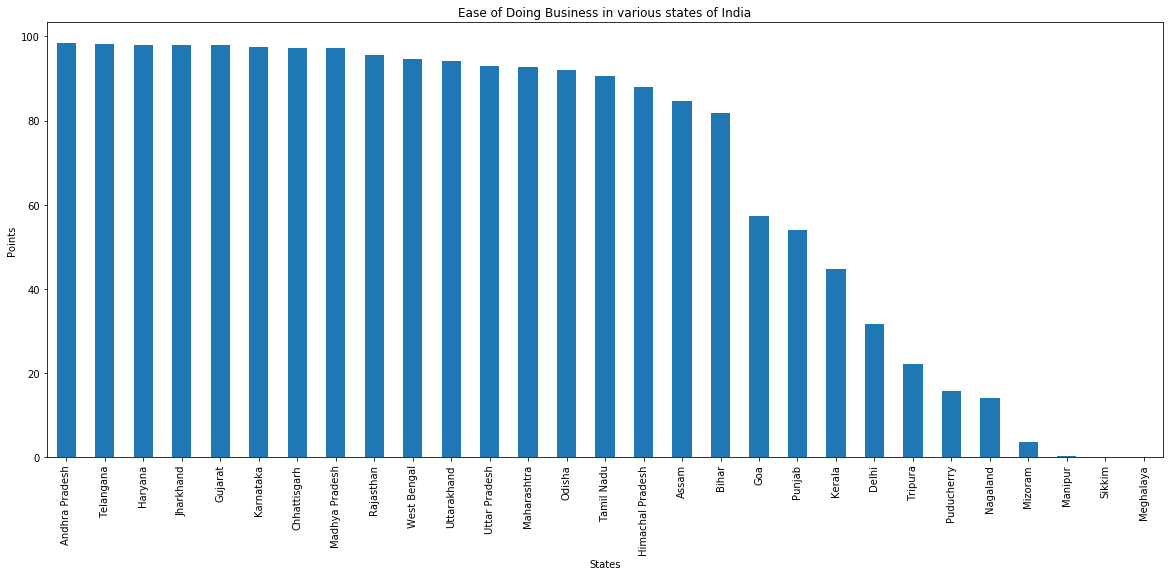

In [255]:
Ease1.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('Points')
plt.title('Ease of Doing Business in various states of India')

plt.show()

In [277]:
df_NDSP_Ease_Trans_Elec_Popu_sortNSDP = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['NSDP Per capita in US Dollars'], ascending = False)
Transposed2 = df_NDSP_Ease_Trans_Elec_Popu_sortNSDP.transpose()
NSDP = Transposed2.loc['NSDP Per capita in US Dollars', States]

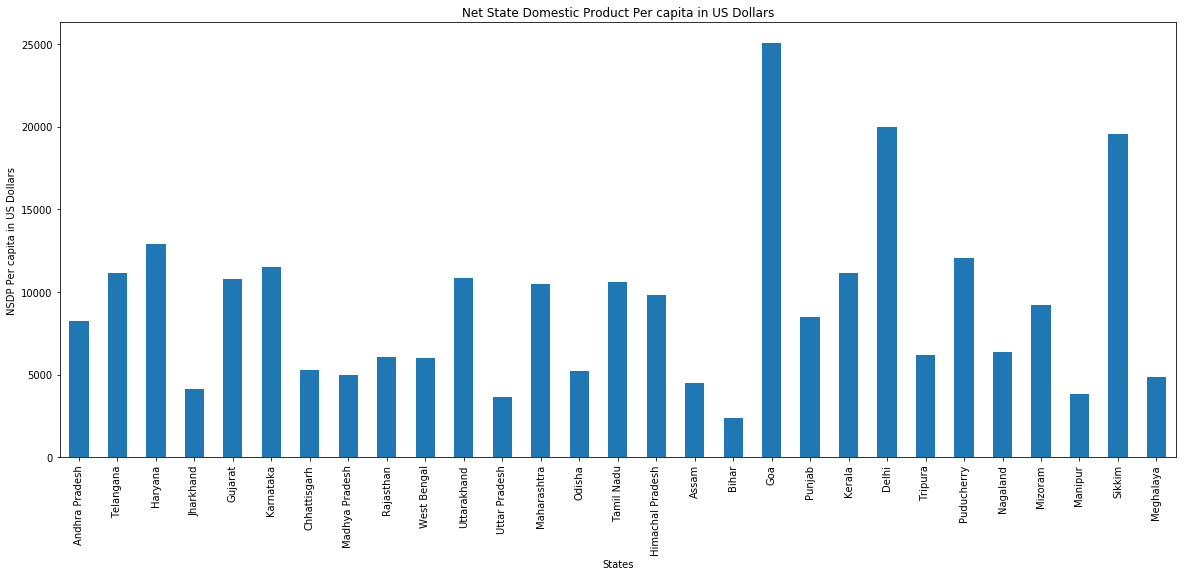

In [278]:
NSDP.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('NSDP Per capita in US Dollars')
plt.title('Net State Domestic Product Per capita in US Dollars') 

plt.show()

In [275]:
df_NDSP_Ease_Trans_Elec_Popu_sortTrans = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['Total Length of Transport Network(km)'], ascending = False)
Transposed3 = df_NDSP_Ease_Trans_Elec_Popu_sortTrans.transpose()
Trans = Transposed3.loc['Total Length of Transport Network(km)', States]

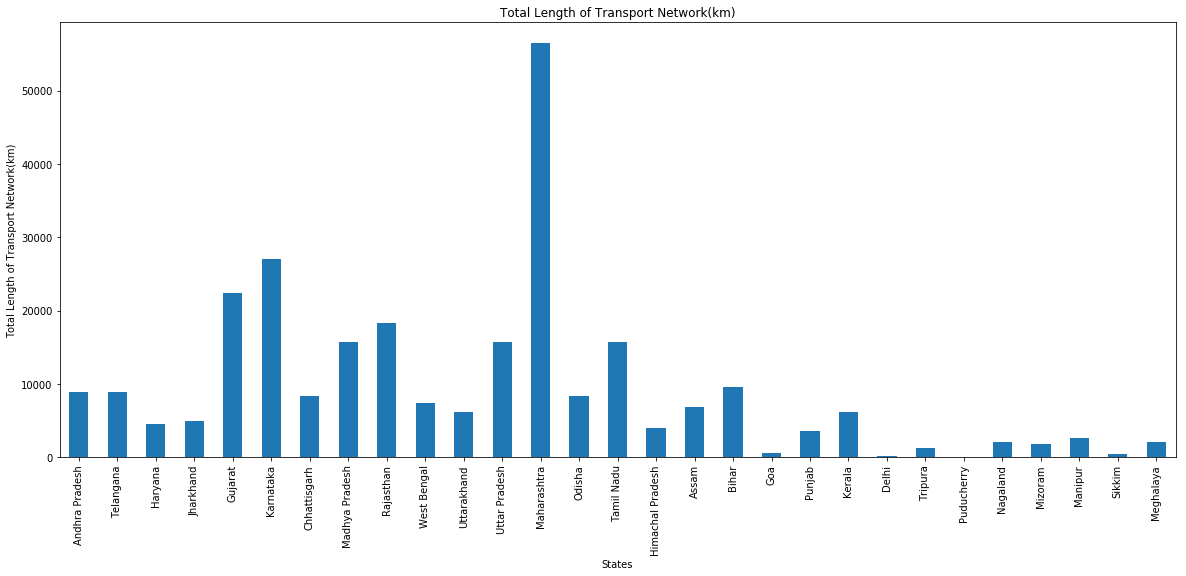

In [259]:
Trans.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('Total Length of Transport Network(km)')
plt.title('Total Length of Transport Network(km)') 

plt.show()

In [296]:
Transposed4

States,Delhi,Goa,Puducherry,Punjab,Himachal Pradesh,Sikkim,Kerala,Tamil Nadu,Andhra Pradesh,Haryana,Telangana,Karnataka,Uttarakhand,Nagaland,Gujarat,Mizoram,Chhattisgarh,West Bengal,Tripura,Maharashtra,Manipur,Meghalaya,Rajasthan,Madhya Pradesh,Odisha,Jharkhand,Assam,Uttar Pradesh,Bihar
Ease of doing Business Medal,Slow Mover,Average Mover,Aspirers,Average Mover,Fast Mover,Very High Aspirers,Slow Mover,Achievers,Top Achievers,Top Achievers,Top Achievers,Top Achievers,Achievers,Aspirers,Top Achievers,High Aspirers,Top Achievers,Achievers,Aspirers,Achievers,Very High Aspirers,Very High Aspirers,Top Achievers,Top Achievers,Achievers,Top Achievers,Fast Mover,Achievers,Fast Mover
Ease of Doing Business Points,31.6,57.34,15.65,53.92,87.9,0.13,44.79,90.68,98.42,98.07,98.33,97.4,94.21,14.04,97.96,3.63,97.36,94.7,22.27,92.71,0.27,0,95.69,97.31,92.09,97.99,84.75,92.87,81.91
Normalized_Points,0.321073,0.582605,0.159012,0.547856,0.893111,0.00132087,0.45509,0.921357,1,0.996444,0.999086,0.989636,0.957224,0.142654,0.995326,0.0368827,0.98923,0.962203,0.226275,0.941983,0.00274334,0,0.972262,0.988722,0.935684,0.995631,0.861105,0.943609,0.83225
NSDP Per capita in US Dollars,19974,25044,12047,8470,9792,19543,11153,10587,8261,12904,11174,11524,10860,6387,10789,9215,5294,5983,6180,10477,3824,4865,6044,4973,5200,4154,4485,3635,2395
Normalized_NSDP,0.776149,1,0.426156,0.268224,0.326593,0.75712,0.386684,0.361694,0.258996,0.463994,0.387611,0.403064,0.373747,0.176255,0.370612,0.301117,0.127997,0.158418,0.167116,0.356837,0.0630933,0.109056,0.161111,0.113824,0.123847,0.0776635,0.0922778,0.0547486,0
Total Length of Transport Network(km),160,541,102.03,3613.15,4022.48,488,6152.52,15770.1,8859.08,4578.48,8859.07,27068.3,6152.92,2047.09,22453.3,1881,8318.4,7414.8,1266,56486.4,2625.74,2060.36,18262.2,15685.6,8298.52,4882.64,6809.06,15739,9535.79
Normalized_Length(km),0.00102812,0.00778531,0,0.0622711,0.0695307,0.00684533,0.107308,0.27788,0.15531,0.0793916,0.15531,0.478257,0.107315,0.0344964,0.396409,0.0315507,0.145721,0.129695,0.0206435,1,0.044759,0.0347318,0.322078,0.27638,0.145368,0.084786,0.118952,0.277328,0.167311
Households having electricity (%),99.8,99.8,99.6,99.6,99.5,99.4,99.2,98.8,98.8,98.8,98.3,97.8,97.5,97,96,95.9,95.6,93.7,92.7,92.5,92.4,91.4,91,89.9,85.5,80.1,78.2,70.9,58.6
Normalized_Electricity,1,1,0.995146,0.995146,0.992718,0.990291,0.985437,0.975728,0.975728,0.975728,0.963592,0.951456,0.944175,0.932039,0.907767,0.90534,0.898058,0.851942,0.82767,0.822816,0.820388,0.796117,0.786408,0.759709,0.652913,0.521845,0.475728,0.298544,0
Population,1.67879e+07,1.45854e+06,1.24795e+06,2.77433e+07,6.8646e+06,610577,3.34061e+07,7.2147e+07,4.95771e+07,2.53515e+07,3.50037e+07,6.10953e+07,1.00863e+07,1.9785e+06,6.04397e+07,1.09721e+06,2.55452e+07,9.12761e+07,3.67392e+06,1.12374e+08,2.57039e+06,2.96689e+06,6.85484e+07,7.26268e+07,4.19742e+07,3.29881e+07,3.12056e+07,1.99812e+08,1.04099e+08


In [279]:
df_NDSP_Ease_Trans_Elec_Popu_sortElec = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['Households having electricity (%)'], ascending = False)
Transposed4 = df_NDSP_Ease_Trans_Elec_Popu_sortElec.transpose()
Elec = Transposed4.loc['Households having electricity (%)', States]

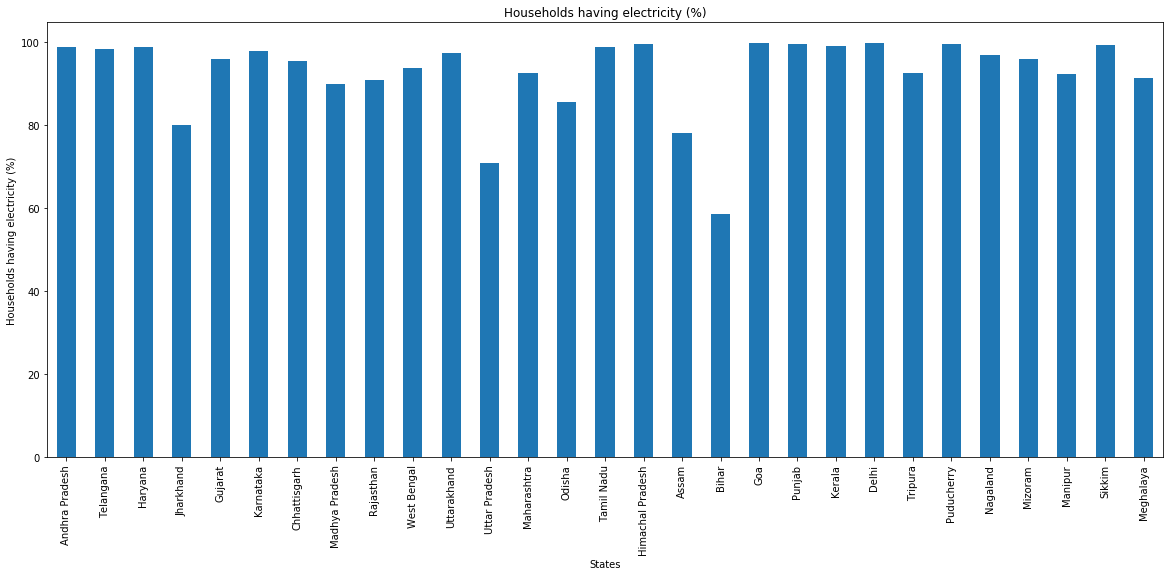

In [280]:
Elec.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('Households having electricity (%)')
plt.title('Households having electricity (%)')

plt.show()

In [281]:
df_NDSP_Ease_Trans_Elec_Popu_sortPopu = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['Population'], ascending = False)
Transposed5 = df_NDSP_Ease_Trans_Elec_Popu_sortPopu.transpose()
Popu = Transposed5.loc['Population', States]

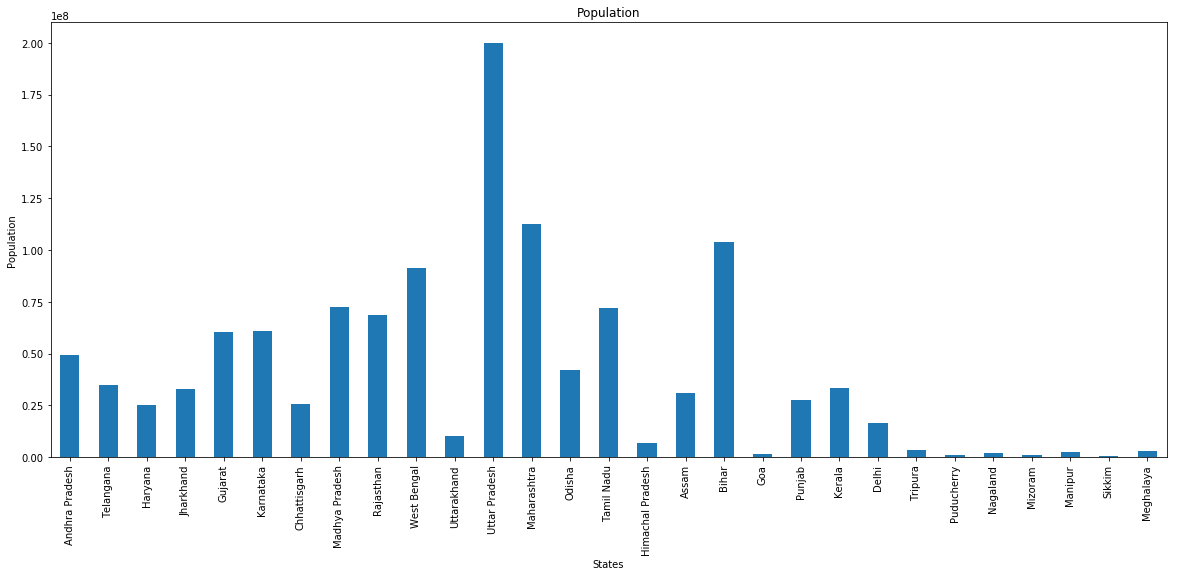

In [282]:
Popu.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('Population')
plt.title('Population')

plt.show()

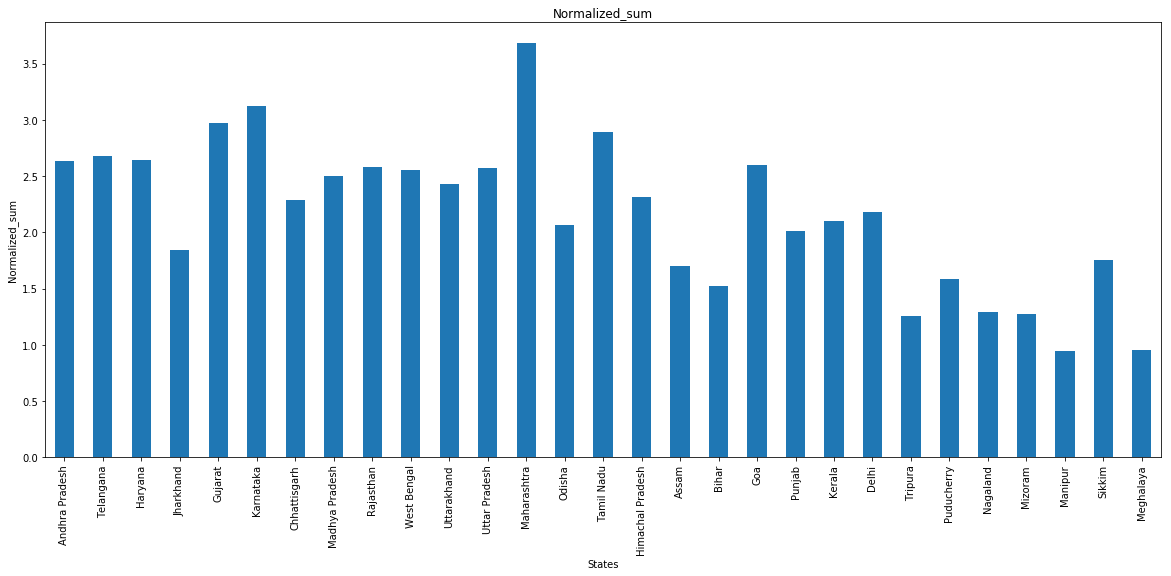

In [283]:
df_NDSP_Ease_Trans_Elec_Popu_sortSum = df_NDSP_Ease_Trans_Elec_Popu.sort_values(by = ['Normalized_sum'], ascending = False)
TransposedX = df_NDSP_Ease_Trans_Elec_Popu_sortSum.transpose()
SumX = TransposedX.loc['Normalized_sum', States]

SumX.plot(kind='bar', figsize=(20, 8))

plt.xlabel('States')
plt.ylabel('Normalized_sum')
plt.title('Normalized_sum')

plt.show()

In [286]:
df_NDSP_Ease_Trans_Elec_Popu.describe()

,Ease of Doing Business Points,Normalized_Points,NSDP Per capita in US Dollars,Normalized_NSDP,Total Length of Transport Network(km),Normalized_Length(km),Households having electricity (%),Normalized_Electricity,Population,Normalized_Population,Normalized_sum
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000,2.900000e+01,29.000000,29.000000
mean,66.689310,0.677599,9145.965517,0.298069,9314.933103,0.163395,92.70000,0.827670,4.119162e+07,0.203718,2.170451
std,37.948626,0.385578,5273.494893,0.232836,11410.109474,0.202363,9.71365,0.235768,4.481559e+07,0.224976,0.671995
min,0.000000,0.000000,2395.000000,0.000000,102.030000,0.000000,58.60000,0.000000,6.105770e+05,0.000000,0.940822
25%,31.600000,0.321073,5200.000000,0.123847,2060.360000,0.034732,91.40000,0.796117,3.673917e+06,0.015378,1.701651
50%,90.680000,0.921357,8470.000000,0.268224,6152.920000,0.107315,96.00000,0.907767,3.120558e+07,0.153588,2.286178
75%,97.310000,0.988722,11153.000000,0.386684,9535.790000,0.167311,98.80000,0.975728,6.109530e+07,0.303635,2.594647
max,98.420000,1.000000,25044.000000,1.000000,56486.440000,1.000000,99.80000,1.000000,1.998123e+08,1.000000,3.682694


In [294]:
df_without_normalized = df_NDSP_Ease_Trans_Elec_Popu.drop(columns = ['Normalized_Points','Normalized_NSDP','Normalized_Length(km)','Normalized_Electricity','Normalized_Population','Normalized_sum'])

In [305]:
df_States_Capital = df_without_normalized.reset_index(level=0).drop(columns = ['Ease of doing Business Medal','Ease of Doing Business Points','NSDP Per capita in US Dollars','Total Length of Transport Network(km)','Households having electricity (%)','Population'])

In [307]:
Capital = ['Amaravati', 
           'Dispur',
           'Patna',
           'Raipur',
           'Delhi',
           'Panaji',
           'Gandhinagar',
           'Chandigarh',
           'Shimla',
           'Ranchi',
           'Bangalore',
           'Thiruvananthapuram',
           'Bhopal',
           'Mumbai',
           'Imphal',
           'Shillong',
           'Aizawl',
           'Kohima',
           'Bhubaneswar',
           'Pondicherry',
           'Chandigarh',
           'Jaipur',
           'Gangtok',
           'Chennai',
           'Hyderabad',
           'Agartala',
           'Lucknow',
           'Dehradun ',
           'Kolkata']

In [308]:
df_States_Capital['Capital'] = Capital

In [313]:
df_States_Capital

,States,Capital,Latitude,Longitude
0,Andhra Pradesh,Amaravati,20.93333,77.75000
1,Assam,Dispur,26.13436,91.80457
2,Bihar,Patna,25.60129,85.13751
3,Chhattisgarh,Raipur,21.24402,81.63477
4,Delhi,Delhi,28.63410,77.21689
5,Goa,Panaji,15.45844,73.80566
6,Gujarat,Gandhinagar,23.24082,72.63733
7,Haryana,Chandigarh,30.70341,76.78943
8,Himachal Pradesh,Shimla,31.10321,77.15847
9,Jharkhand,Ranchi,23.35060,85.31378


In [298]:
Top_States_DataFrame

,Ease of doing Business Medal,Ease of Doing Business Points,Normalized_Points,NSDP Per capita in US Dollars,Normalized_NSDP,Total Length of Transport Network(km),Normalized_Length(km),Households having electricity (%),Normalized_Electricity,Population,Normalized_Population,Normalized_sum
States,,,,,,,,,,,,
Karnataka,Top Achievers,97.40,0.989636,11524.0,0.403064,27068.29,0.478257,97.8,0.951456,61095297.0,0.303635,3.126050
Maharashtra,Achievers,92.71,0.941983,10477.0,0.356837,56486.44,1.000000,92.5,0.822816,112374333.0,0.561058,3.682694


In [310]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_States_Capital["Capital"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

In [312]:
df_States_Capital['Latitude'] = df_coords['Latitude']
df_States_Capital['Longitude'] = df_coords['Longitude']

In [330]:
CLIENT_ID = 'PCHGJ3UZKNQKLG4PK3B4A4034B1EYXTBIMKBLJCVUXZJ5CZE' # your Foursquare ID
CLIENT_SECRET = 'AUJBIJWVCKQUUSPFDSL3PG5KIDQ0QZL2C104AHCIH5W2TGLN' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PCHGJ3UZKNQKLG4PK3B4A4034B1EYXTBIMKBLJCVUXZJ5CZE
CLIENT_SECRET:AUJBIJWVCKQUUSPFDSL3PG5KIDQ0QZL2C104AHCIH5W2TGLN


In [351]:
LIMIT = 100

In [332]:
latitude_Mumbai = 18.94017
longitude_Mumbai = 72.83483
radius = 2000

In [352]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Mumbai, longitude_Mumbai, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=PCHGJ3UZKNQKLG4PK3B4A4034B1EYXTBIMKBLJCVUXZJ5CZE&client_secret=AUJBIJWVCKQUUSPFDSL3PG5KIDQ0QZL2C104AHCIH5W2TGLN&ll=18.94017,72.83483&v=20180605&radius=2000&limit=100'

In [334]:
import requests

In [353]:
results = requests.get(url).json()
'There are {} around Mumbai.'.format(len(results['response']['groups'][0]['items']))

'There are 100 around Mumbai.'

In [354]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4caa0096d971b1f7ccca23e1',
  'name': 'Royal China',
  'location': {'address': 'Waudby Road',
   'lat': 18.938715239156295,
   'lng': 72.83293313173236,
   'labeledLatLngs': [{'label': 'display',
     'lat': 18.938715239156295,
     'lng': 72.83293313173236}],
   'distance': 257,
   'cc': 'IN',
   'city': 'Mumbai',
   'state': 'Mahārāshtra',
   'country': 'India',
   'formattedAddress': ['Waudby Road', 'Mumbai', 'Mahārāshtra', 'India']},
  'categories': [{'id': '4bf58dd8d48988d145941735',
    'name': 'Chinese Restaurant',
    'pluralName': 'Chinese Restaurants',
    'shortName': 'Chinese',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4caa0096d971b1f7ccca23e1-0'}

In [355]:
dataframe = json_normalize(items) # flatten JSON
dataframe.columns = [col.split('.')[-1] for col in dataframe.columns]

dataframe.shape

(100, 22)

In [350]:
venues_map = folium.Map(location=[latitude_Mumbai, longitude_Mumbai], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude_Mumbai, longitude_Mumbai],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe.lat, dataframe.lng, dataframe.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map